# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angellicacsavage/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/angellicacsavage/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/angellicacsavage/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')

# 2. Print the shape
print(df.shape)

(11314, 4)


In [3]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


In [7]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [9]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def string_to_lower(astring):
    return astring.lower()

string_to_lower(test_string)

'this is a sentence with lots of caps.'

In [12]:
# 2. Make a function that removes all punctuation. 

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punct(astring):
    astring = re.sub(r'[^\w\s]','',astring)
    return astring

remove_punct(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [13]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(astring):
    
    words = word_tokenize(astring)
    
    none_stopwords = []
    
    for word in words:
        
        if word not in stopwords:
            
            none_stopwords.append(word)
            
    astring = ' '.join(none_stopwords)
    
    return astring

remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [16]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stem_words(astring):
    
    porter = PorterStemmer()
    
    words = word_tokenize(astring)
    
    stemmed_words = []
    
    for word in words:
        
        st_words = porter.stem(word)
        
        stemmed_words.append(st_words)
        
    astring = ' '.join(stemmed_words)
    
    return astring

stem_words(test_string)

'i play and start play with player and we all love to play with play'

In [17]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started playing with players and we all love to play with plays'

def pipeline(astring):
    astring = string_to_lower(astring)
    astring = remove_punct(astring)
    astring = remove_stopwords(astring)
    astring = stem_words(astring)
    
    return astring

In [18]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [23]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['clean_message'] = df['message']
df['clean_message'] = df['message'].apply(pipeline)

print("Original Message:\n", df['message'][0])
print("Cleaned Message:\n", df['clean_message'][0])

Original Message:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Cleaned Message:
 lerxstwamumdedu where thing subject car nntppostinghost rac3wamumdedu organ univers maryland colleg park line 15 wonder anyon could enlighten car saw day 2door sport car look late 60 earli 70 call bricklin door realli small addit front bumpe

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [24]:
df.head()

,id,message,topic,topic_category,clean_message
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


In [25]:
# 1. Define your `X` and `y` data. 

X = df['clean_message']

y = df['topic_category']

In [26]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [27]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

TfidfVectorizer()

In [28]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)

In [29]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape)
print(f'''There are {X.shape[1]} features''')

(11314, 119708)
There are 119708 features


# Split your data into Training and Testing data. 

In [30]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [31]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha = .05)

In [32]:
# Fit our model with our training data.

model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [33]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)

In [34]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.914715


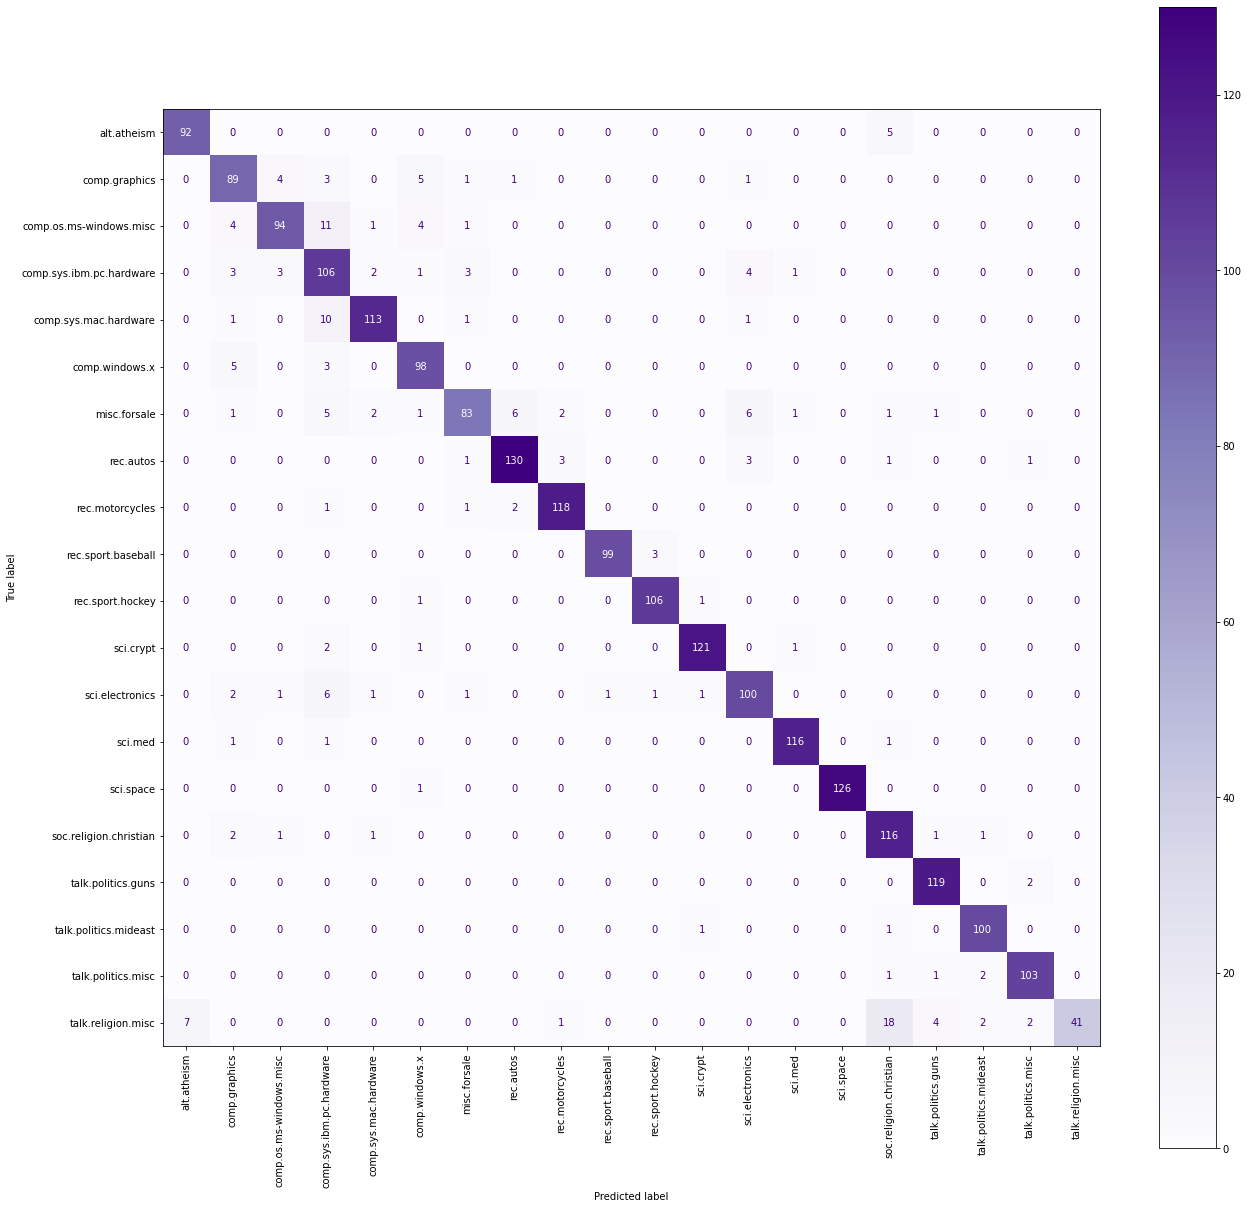

In [35]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21, 21))

display = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, 
                                cmap = plt.cm.Purples, ax = ax)

plt.xticks(rotation=90)

display

In [36]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names = model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        97
           comp.graphics       0.82      0.86      0.84       104
 comp.os.ms-windows.misc       0.91      0.82      0.86       115
comp.sys.ibm.pc.hardware       0.72      0.86      0.78       123
   comp.sys.mac.hardware       0.94      0.90      0.92       126
          comp.windows.x       0.88      0.92      0.90       106
            misc.forsale       0.90      0.76      0.83       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.95      0.97      0.96       122
      rec.sport.baseball       0.99      0.97      0.98       102
        rec.sport.hockey       0.96      0.98      0.97       108
               sci.crypt       0.98      0.97      0.97       125
         sci.electronics       0.87      0.88      0.87       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [41]:
my_sentence = "CNN talks firearm reform"

# 1. Apply the text pipeline to your sentence

my_sentence = pipeline(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

X = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`. 

model.predict(X)

# 4. Print the prediction

pp = model.predict_proba(X)
for c, p in zip(model.classes_, pp.round(3)[0]):
    print(c, p)

alt.atheism 0.005
comp.graphics 0.004
comp.os.ms-windows.misc 0.003
comp.sys.ibm.pc.hardware 0.013
comp.sys.mac.hardware 0.008
comp.windows.x 0.005
misc.forsale 0.003
rec.autos 0.005
rec.motorcycles 0.007
rec.sport.baseball 0.005
rec.sport.hockey 0.007
sci.crypt 0.043
sci.electronics 0.006
sci.med 0.009
sci.space 0.017
soc.religion.christian 0.019
talk.politics.guns 0.555
talk.politics.mideast 0.053
talk.politics.misc 0.222
talk.religion.misc 0.012


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

Because tweets are so small already, try not removing stopwords....

In [43]:
# 1. Load the dem-vs-rep-tweets data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [44]:
# Text pipeline function without removing stopwords, to clean the tweets

def text_pipeline(astring):
    astring = string_to_lower(astring)
    astring = remove_punct(astring)
    astring = stem_words(astring)
    
    return astring

In [46]:
# Apply the text pipeline function
df['cleaned_tweet'] = df['Tweet']
df['cleaned_tweet'] = df['Tweet'].apply(text_pipeline)

print("Original Tweet:\n", df['Tweet'][0])
print("Cleaned Tweet:\n", df['cleaned_tweet'][0])

Original Tweet:
 Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
Cleaned Tweet:
 today senat dem vote to savetheinternet proud to support similar netneutr legisl here in the hous httpstcon3tggdlu1l


In [47]:
df.head()

,Party,Handle,Tweet,cleaned_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senat dem vote to savetheinternet proud ...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter haven resid alta vist...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto note that hurrican ...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolici meet with repdarrensoto thank ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurrican season start on june 1st...


In [58]:
# Set independent and dependent variables

X = df['cleaned_tweet']

y = df['Party']

In [59]:
# Initialize vectorizor
vectorizer = TfidfVectorizer()

# Fit vectorizer using X data
vectorizer.fit(X)

# Transform X data using fitted vectorizer
X = vectorizer.transform(X)

In [60]:
# Print the shape of X and the number of features

print(X.shape)
print(f'''There are {X.shape[1]} features''')

(86460, 121192)
There are 121192 features


In [61]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [130]:
# Initalize model. 

model = MultinomialNB(alpha = .20)

In [131]:
# Fit model with training data.

model.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [132]:
# Make new predictions from testing data. 

y_pred = model.predict(X_test)

In [138]:
# Print the f1-score of the model. 
f1 = model.score(X_test, y_test)

print(f"Model f1: {f1}")

Model f1: 0.8111843627110803


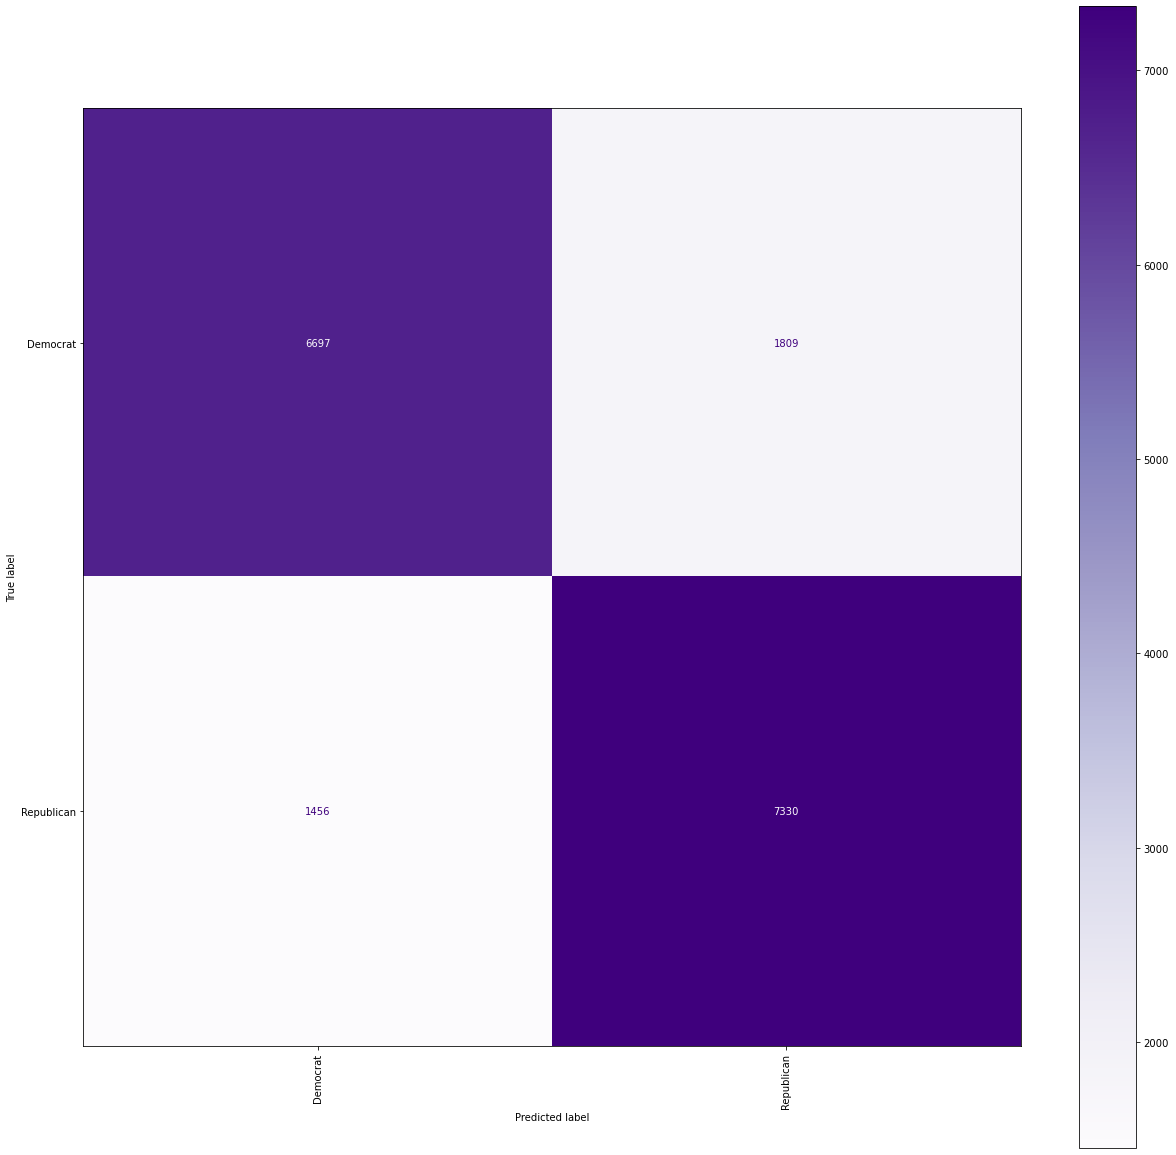

In [135]:
# Confusion matrix of predictions
fig, ax = plt.subplots(figsize=(21, 21))

display = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, 
                                cmap = plt.cm.Purples, ax = ax)

plt.xticks(rotation=90)

display

In [136]:
# `Classification_report` for all the classes.
print(classification_report(y_test, y_pred, target_names = model.classes_))

              precision    recall  f1-score   support

    Democrat       0.82      0.79      0.80      8506
  Republican       0.80      0.83      0.82      8786

    accuracy                           0.81     17292
   macro avg       0.81      0.81      0.81     17292
weighted avg       0.81      0.81      0.81     17292

